In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [162]:
def hd(n=5):
    return df.head(n)

In [163]:
df = pd.read_csv('StudentsPerformance.csv')

In [164]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [166]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Preprocessing 

In [167]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [170]:
df['gender'].dtype

dtype('O')

In [171]:
for i in df.columns:
    if df[i].dtype=='O':
        print(i,"\n",df[i].unique())
        print('-'*20)

gender 
 ['female' 'male']
--------------------
race/ethnicity 
 ['group B' 'group C' 'group A' 'group D' 'group E']
--------------------
parental level of education 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------
lunch 
 ['standard' 'free/reduced']
--------------------
test preparation course 
 ['none' 'completed']
--------------------


## Adding new column 'Total Marks'

In [172]:
df['total marks'] = df['math score'] + df['reading score'] + df['writing score']

## Adding new column for each mark column as pass and fail 
## if mark>=35 then pass else fail

In [173]:
hd(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [174]:
df['math status']=np.where(df['math score']>=35,"Pass","Fail")
df['reading status']=np.where(df['reading score']>=35,"Pass","Fail")
df['writing status']=np.where(df['writing score']>=35,"Pass","Fail")

### Also giving a file status column 
### Like if passed in all 3 subject then pass else fail

In [175]:
df['final status'] = np.where(df['math status']=='Fail','Fail',
                              np.where(df['reading status']=='Fail','Fail',
                                       np.where(df['writing status']=='Fail','Fail',
                                                "Pass")))
                              

In [176]:
len(df.loc[df['final status']=='Fail'])

29

In [177]:
hd()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,math status,reading status,writing status,final status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Pass,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,229,Pass,Pass,Pass,Pass


In [178]:
df.describe()

,math score,reading score,writing score,total marks
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


<hr>

# EDA
 
 
<hr>


## Univariate Analysis

<hr>

### 1 Distribution Using Pie Chart

Text(0.5, 1.0, 'test preparation course Pie')

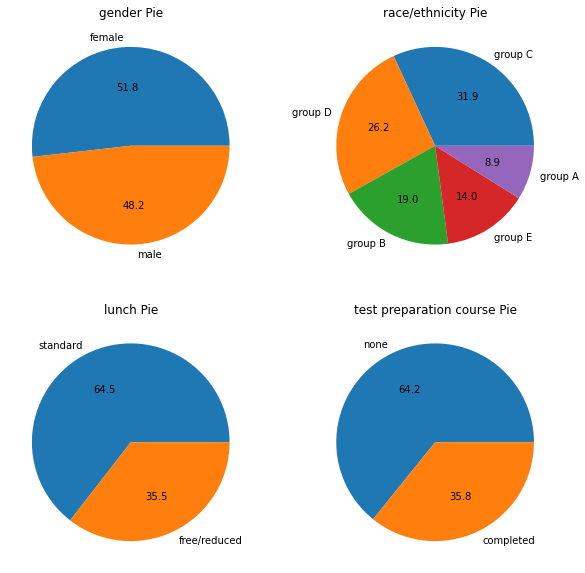

In [179]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.pie(x=df['gender'].value_counts().values,labels=df['gender'].value_counts().index,
       autopct='%.1f')
plt.title('gender Pie')
plt.subplot(2,2,2)
plt.pie(x=df['race/ethnicity'].value_counts().values,labels=df['race/ethnicity'].value_counts().index,
       autopct='%.1f')
plt.title('race/ethnicity Pie')
plt.subplot(2,2,3)
plt.pie(x=df['lunch'].value_counts().values,labels=df['lunch'].value_counts().index,
       autopct='%.1f')
plt.title('lunch Pie')
plt.subplot(2,2,4)
plt.pie(x=df['test preparation course'].value_counts().values,labels=df['test preparation course'].value_counts().index,
       autopct='%.1f')
plt.title('test preparation course Pie')

### 2 Distribution of Parental Level Of Eduction Count Plot 

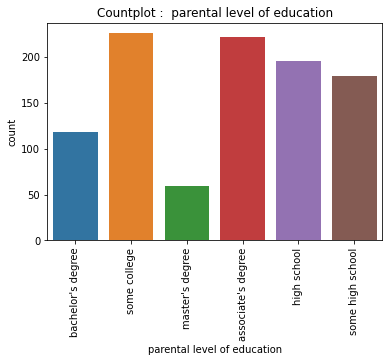

In [180]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='parental level of education')
plt.xticks(rotation=90)
plt.title('Countplot :  parental level of education')
plt.show()

### 3. Boxplot and histplot with Kde ( for checking outliers and the distribution of marks 

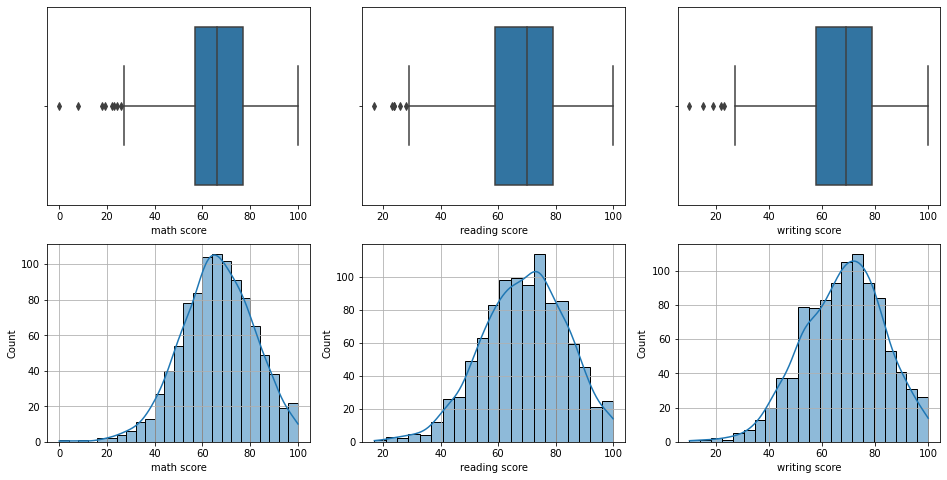

In [181]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='math score')
plt.subplot(2,3,2)
sns.boxplot(data = df,x='reading score')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='writing score')

plt.subplot(2,3,4)
plt.grid(True)
sns.histplot(df['math score'],kde=True)
plt.subplot(2,3,5)
plt.grid(True)
sns.histplot(df['reading score'],kde=True)
plt.subplot(2,3,6)
plt.grid(True)
sns.histplot(df['writing score'],kde=True)
plt.show()

### 4 Pie Chart for checking status of each subject and also last the final status distributionm

Text(0.5, 1.0, 'final status Pie')

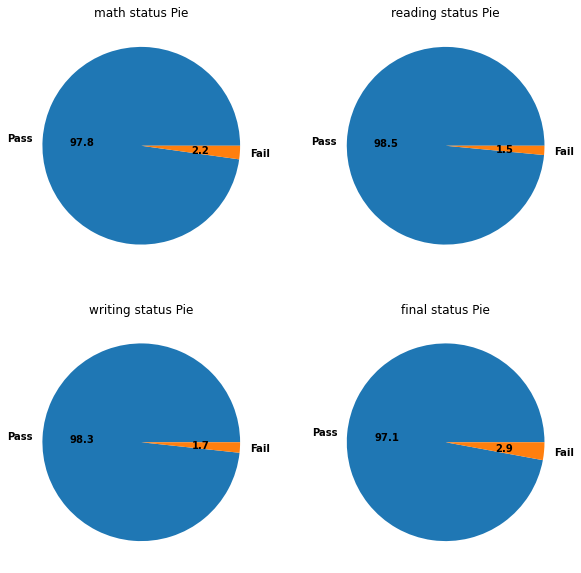

In [192]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.pie(x=df['math status'].value_counts().values,labels=df['math status'].value_counts().index,
       autopct='%.1f',textprops={'color':'black','weight':'bold'})
plt.title('math status Pie')
plt.subplot(2,2,2)
plt.pie(x=df['reading status'].value_counts().values,labels=df['reading status'].value_counts().index,
       autopct='%.1f',textprops={'color':'black','weight':'bold'})
plt.title('reading status Pie')
plt.subplot(2,2,3)
plt.pie(x=df['writing status'].value_counts().values,labels=df['writing status'].value_counts().index,
       autopct='%.1f',textprops={'color':'black','weight':'bold'})
plt.title('writing status Pie')
plt.subplot(2,2,4)
plt.pie(x=df['final status'].value_counts().values,labels=df['final status'].value_counts().index,
       autopct='%.1f',textprops={'color':'black','weight':'bold'})
plt.title('final status Pie')